## Notebook made by

__Name__: Lucas de Wolff & Jeroen Taal

__Student id__ : 11863455 & 11755075

# Search engine result page

Each hit has is represented using the following features:
- A link to the pdf file of the document
- The title
- The names of the authors
- The year of publication
- The first sentences of the abstract

The results are ranked based on the relevancy with respect to the query, as calculated by elastic search.
We chose to create a hyperlink to the pdf file as the title of the pdf, as the link itself is uninformative and would only take unnecessary space. Also the first sentences of the abstract of the paper are hidden behind a button to save space and keep a clear view of the results.

We chose to use the first sentences of the abstract as a representation as it provides the best description of the content of the paper. Another practice often performed in information retrieval, is showing the exact hits as snippets. However, showing the hits will result in snippets which are out of context and therefore uninformative. Therefore we decided to use the abstract as this does provide an informative description about the document.

A screenshot of our result page:


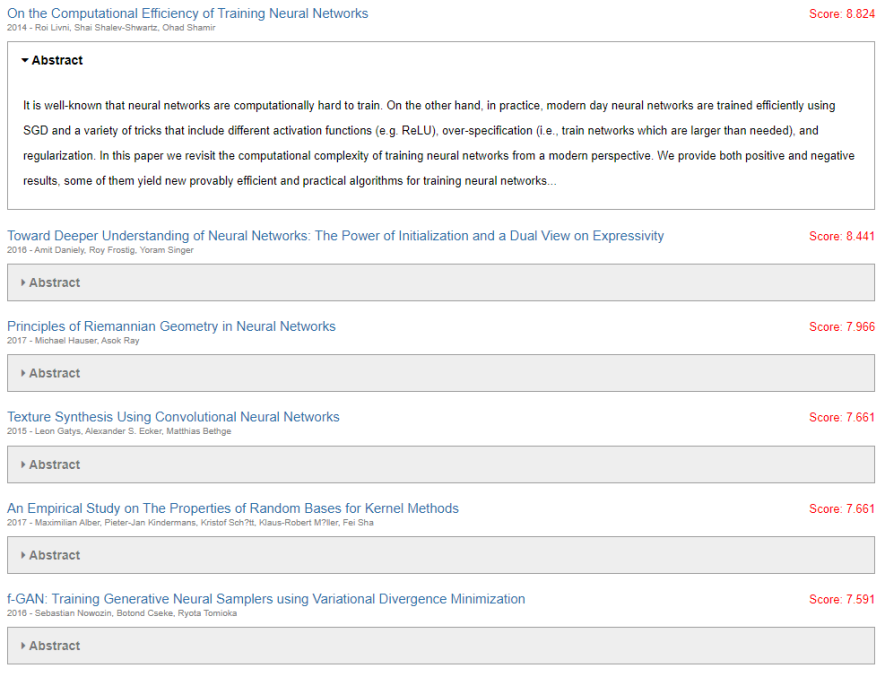

# Advanced Search

Next to simple text queries, it is possible to use comlex queries which filter on multiple facets. In the screenshot below, the possible filters can be seen on the right. The search bar on the top left is the main search bar.

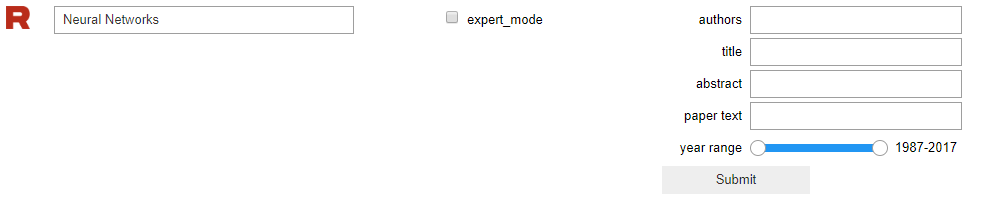

After the user searched for the query "neural networks", it is possible to filter on:
- author names
- title
- abstract
- paper text
- year

The filters behave as absolute matches. So if a user types word X in the title, abstract or paper text bar, only results with X in the title, abstract or paper text will show. Same goes for the authors bar, however not the entire name needs to match, just the last name (or first name) is suffice. Using the slider the user can also select a range of years to only match papers in published in a certain period.

It is also possible to check the "expert mode" checkbox. This will give the user acces to the elastic search "query_string" syntax. Using this mode, the user can select sertain fields, use wildcards and create boolean queries.
An example of a boolean query which searches in the title field:
- Title:(Word 1 AND Word 2)

Using wildcards:
- title:?lastic

The expert mode is a different way to use filter on certain fields. The filter fields on the right side of the screen and expert mode can however not be used simultaniously. This is not really a problem as both features essentially perform the same operations.

Another constraint to the filters is in the authors filter. The 'authors' filter is case-sensitive, as the authors field is indexed as an array by elasticsearch. This has some disadvantages, as the filter value does not get lower cased by elasticsearch but the names in the index are. This will lead to zero results when spelling an authors name with a capital letter.

# Wordclouds

Each query presented by the user will be returned as a wordcloud. Using this wordcloud the user can improve the query by adding words in the word cloud to the query. The wordcloud is generated by elasticsearch using the "significant text aggregations" function. This function measures the importance of the word by comparing it's frequency in a foreground set to the frequency in a background set. The foreground set in this scenario, is the top 100 results. When there is a big change in frequency between these sets, the word is considered important. For example if word X has a occurs 10 times in the top 100 results, it's frequency in the foreground set will be $\frac{10}{100}$. Thus if X occurs only 15 times in the background set of 8000 documents, it's background set is $\frac{15}{8000}$. In this case the frequency of X undergoes a big change between foreground and background set, and thus will be considered important. The foreground set size of 100 is set manually. This is chosen because the "significant text aggregations" function uses a lot of memory.

The quality of the wordcloud depends on the query. The wordcloud of the query "neural networks" can be seen in the screenshot below:

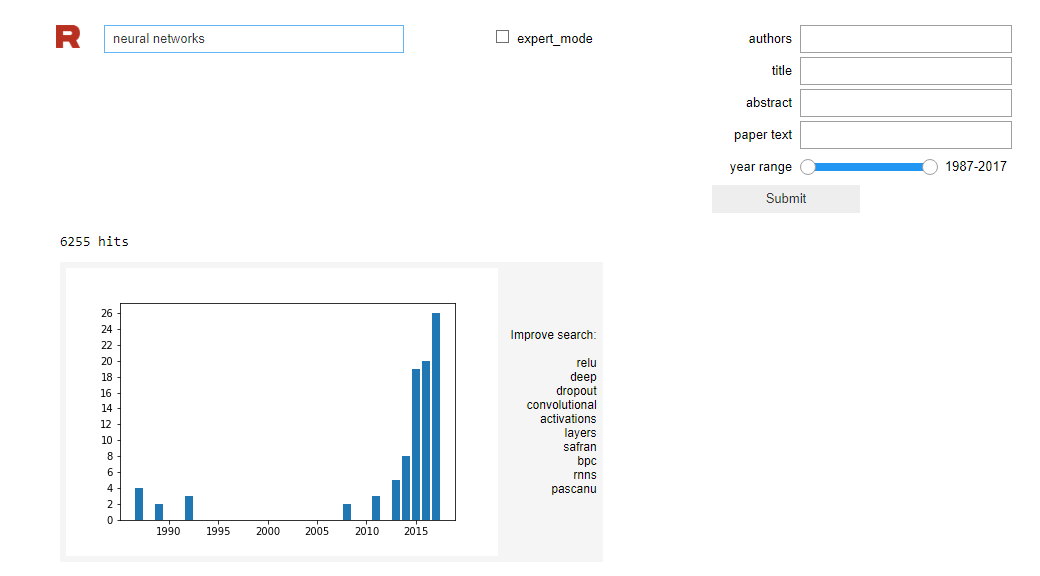

All words expect for "pascanu" and "safran" are terms related to neural networks and can therefore be considered relevant to the query. However "pascanu" and "safran" are both names of authors which are often mentioned in the top 100 results. The occurance of these author names is also described in the at <a href=https://www.elastic.co/guide/en/elasticsearch/reference/master/search-aggregations-bucket-significanttext-aggregation.html>elasticsearch documentation</a>. Setting the parameter "filter duplicate text" to True, should filter text which is often cut and paste (such as author references). However, in our situation, setting the parameter to True does lead to improvement, but not total improvement.

The quality of wordclouds genereted by uninformative queries as showed in the screenshot below, is bad. 
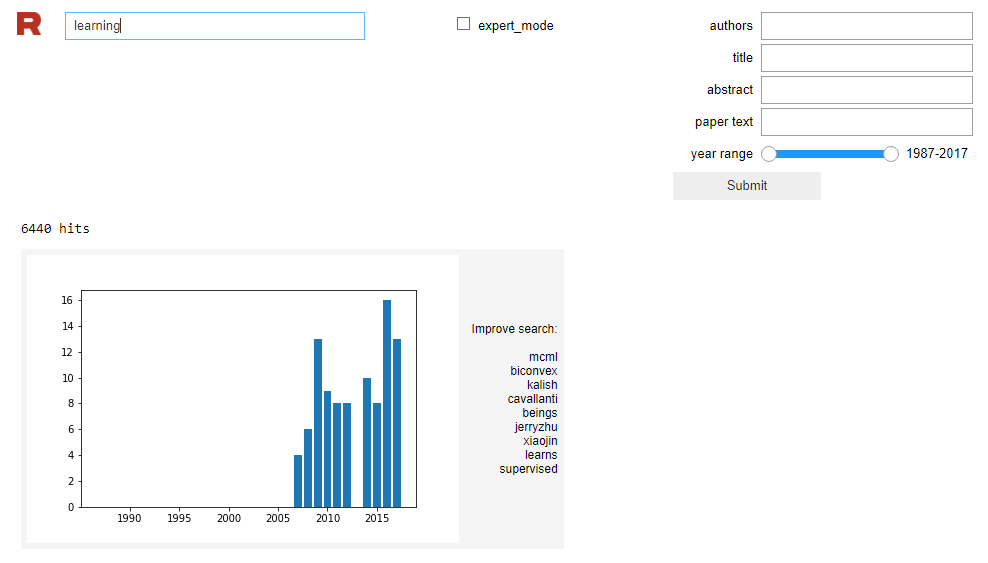
In the screenshot, the wordcloud is a result of the query "learning". This word does have some relation to the set of documents, think of "machine learning" or "deep learning". "learning" however also occurs a lot in common language and therefore a lot of words will occur often togheter with "learning" in the foreground set. As a result, some the words in the wordcloud seem quite random.

# Timeline

The timeline was created using Matplotlib. Matplotlib was chosen because of its simplicity and quality figures.
It shows the amount of documents found in each year out of the top 100 results. Each time the results are updated, the figure is aswell.
In the future, the position of the histogram might need to change, since it appears on top of the results. We chose this location becaus the search engine operates in a jupyter notebook. In the jupyter notebook there is simply not enough horizontal space to present the retrieved documents and the histogram next to eachother. However horizontal alignment with the results and the histogram would be the best position.

The histogram and the not ideal placement of the histogram can be seen in the screenshot below:

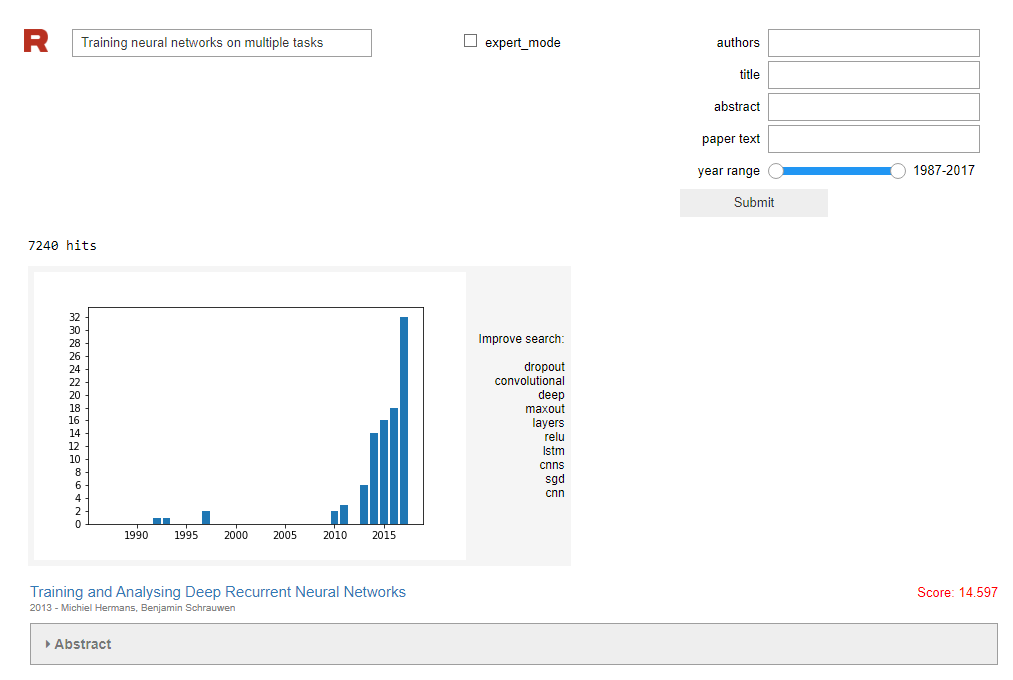

# Faceted search

After submitting a query the user is able to narrow down the results by applying filters and facets. The only facet present in the dataset is the year attribute. The user is able to narrow down the results by selecting certain years. However as described in the Advanced search section, it is also possible to narrow down the search results by selecting certain authors or word occurances in the other available fields.

The filters can be applied by pressing the enter button on the keyboard or hitting the submit button. Before adding the submitt button, the filters were continuous. However, this was annoying as the results refreshed for every change in the filters values. Changing the year range from 1987 - 2017 to just 2017 would refresh the results 30 times.

# Evaluation

We created five scenario's of information need with corresponding queries. The queries are ranked from 'easy' to 'hard'. The easy queries are broad information needs, in contrast hard queries are narrow information needs but contain common words.

<pre>
&lt;topic number="1"  >
    &lt;query>Noisy data&lt;/query>
    &lt;description>Find methods which overcome the problem of noisy data in machine learning pipelines. For example a developer who has to train an algorithm on a noisy dataset.
    &lt;/description>
&lt;/topic>

&lt;topic number="2"  >
    &lt;query>lightweight object detection&lt;/query>
    &lt;description>Find a papers which discusses methods about leightweight objectdetection. For example the DutchNao team at the UvA, who want to find an object detection algorithm which can run on the nao robots during games.
    &lt;/description>
&lt;/topic>

&lt;topic number="3"  >
    &lt;query>Determining relevance of documents&lt;/query>
    &lt;description>Find information about methods which determine the relevance of documents with respect to a query. For example two students which have to create a search engine for an information retrieval course. 
    &lt;/description>
&lt;/topic>

&lt;topic number="4"  >
    &lt;query>Part of speech tagging; year:2013-2017&lt;/query>
    &lt;description>Find a modern approach to tag text. For example a developer who needs to tag text accurately to create a trainin dataset for machine learning algorithms.
    &lt;/description>
&lt;/topic>

&lt;topic number="5"  >
    &lt;query>Training neural networks on multiple tasks&lt;/query>
    &lt;description>Find a paper which describes methods to train neural networks on multiple tasks sequentually without loss of quality. For example a student who is writing an essay about influences of research in neuroscience in the field of Artificial intelligence.
    &lt;/description>
&lt;/topic>
</pre>

To evaluate the relevance of resulting documents we created a set of guidelines:
- The paper needs to contain a section or alinea which adresses the information need.
- Or the information need is described in the abstract.

In [1]:
{
    "lightweight object detection":[1,0,1,1,1,0,0,1,1,1], 
     "Determining relevance of documents":[1,1,1,0,1,0,1,0,1,0], 
     "Noisy data":[1,1,1,1,1,1,1,0,1,1],
    "Part of speech tagging":[1,0,1,0,0,1,1,0,0,0],
    "Training neural networks on multiple tasks":[0,0,0,1,0,0,1,0,0,0]
}

{'lightweight object detection': [1, 0, 1, 1, 1, 0, 0, 1, 1, 1],
 'Determining relevance of documents': [1, 1, 1, 0, 1, 0, 1, 0, 1, 0],
 'Noisy data': [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
 'Part of speech tagging': [1, 0, 1, 0, 0, 1, 1, 0, 0, 0],
 'Training neural networks on multiple tasks': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0]}